# Social Media Mining: Linear Regression 
### Vincent Malic - Spring 2018

## Part I. Simple Linear Regression 
* Only one `independent variable` and one `dependent variable.` 
* Both variables are continuous real numbers 
* DV is represented by ``y`` IVs are represented by``x`` 

### Supervised learning
* Goal of data mining and statistical learning is to find patterns in data
* Pattern is some `relationship` between IVs and DV 
* Relationship between ``x`` and ``y`` is represented as linear equation:  

$y = \beta_0 + \beta_1x$

### Regression Coefficients and line of best fit
* $\beta_0$ is the intercept 
* $\beta_1$ is the slope
* Equation estimates the coefficients to provide a line that best fits the data. 

## 1.1 Importing Libraries
* Numpy is really versatile and we don't know what tools we'll need from it. 
* Import the whole library using the alias ``np``.
* Matplotlib used for visualization

In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

## 1.2 Import Parts of a Library
* Use ``from`` keyword and name of library or sublibrary method is in.
* Follow with ``import`` and the name of the method you want. 
* The method gets imported into the environment with its name only. 
* NOTE: **don't have to use dot notation** with this method 

In [2]:
from numpy import round

x = 0.7
round(x) 

1.0

## 1.3 Import LinearRegression from Scikit-learn
Libraries are organized hierarchically and have "sub-libraries":
* Scikit-learn sublibrary ``linear_model`` contains all its linear models 
* From ``sklearn`` sublibrary ``linear_model``, import the method ``LinearRegression``

In [3]:
from sklearn.linear_model import LinearRegression 

## Step 2. Create Synthetic Dataset
* Synthetic dataset is artifical set of features we artificially create. 
* Can specify exact relationship between independent and dependent variables. 
* Determine how well the model estimates data, compared to true relationship. 
* NOTE: With real world data, we won't know true relationship between IV(s) and DV. 

## 2.1 Set Random Seed
* To generate *same* random numbers each time, by designating the seed that numpy builds the random numbers from. 
* Non-random random numbers - somewhat of a contradiction in terms. 
* When developing your code, you can also set a seed so during development you're getting consistent results. 
* When done developing, run code without a seed to see if your model holds under truly random conditions.

### Random Seed method 
* Takes any number as its argument, just pick one (e.g., "432"). 
* Random numbers generated from the same seed will be the same, no matter who runs it and on what computer its run. 

In [4]:
np.random.seed(3057) 

## Heights
First, let's generate the heights - the independent variable, the variable we can measure and observe. 

Numpy's ``normal`` method takes 3 arguments: the mean, the standard deviation, and the amount of samples. Let's say our aliens have a mean weight of 113 centimeters and the standard deviation - the spread around the mean - is 20. We'll generate 1000 samples.

In [5]:
heights = np.random.normal(113, 20, 1000)

### Data Type: Numpy Array

The return value of the numpy function ``normal`` is a new datatype: a numpy array.

In [6]:
type(heights)

numpy.ndarray

A numpy array is simply a special datatype representing a sequence of numbers. It's not super different from a list; one major difference is that behind-the-scenes numpy is storing the numbers in a way that makes it easier to perform mathematical calculations. Another advantage of numpy arrays is that you can perform *element-wise operations* with them. 

For example, say you have two arrays $a$ and $b$ and you want a third array that contains the sum of each element from $a$ and $b$. With numpy arrays, you can just add them together and get that result. This is much harder to do with standard python lists.

In [7]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a + b

array([5, 7, 9])

Let's take a peek into the heights that were generated.

In [8]:
heights[:25]

array([ 148.26301872,   91.34628367,   98.86534678,  121.27570413,
        132.90888021,  110.90806279,   97.15524614,  101.22194439,
        117.06305949,   89.42646663,  109.1472841 ,  117.23600416,
        110.75196824,   92.74526348,   81.04960924,   90.22069866,
         83.11044862,  114.01626913,  148.77695432,  109.8186788 ,
         85.80658636,  109.60275771,  111.82411747,  103.86530328,
        122.79091825])

As you can see, the heights are clustered around 113, but there's a spread. Some aliens are taller, some are shorter. 

# Weights

Now, let's generate the weights. Here's where the synethic part comes in: we're going to generate the heights directly from the weights, using a linear equation: $\text{weight} = 25.39 + .34 \cdot \text{height} + \epsilon$. I've just made these numbers up. $25.39$ will be the intercept, $\beta_0$, and $.34$ will be the slope, $\beta_1$. 

The $\epsilon$ represents the natural variation that occurs when a relationship isn't *exactly* linear. After all, there may be short aliens that are heavier and tall aliens that are lighter. Such aliens deviate from the linear trend, but the trend still holds. These deviations are also known as *noise*

In [9]:
noise = np.random.normal(0, 5, 1000) # Introduce some noise into the dependent variable. Noise is a numpy array of length 1000. 
weights = 25.39 + .34 * heights + noise # Heights are generated from weights via a linear function. Noise is added.
weights[:25] # Peeking into heights

array([ 81.17100334,  48.97108237,  62.2181163 ,  66.26756442,
        75.61767378,  58.8070338 ,  64.23941426,  62.1639173 ,
        65.0945943 ,  59.43164309,  70.72328823,  65.87809307,
        63.63342536,  62.03837866,  45.56990758,  48.74590021,
        58.55908425,  58.97574389,  81.06447808,  59.06207191,
        60.00121301,  62.73816287,  67.45546926,  60.07201005,  60.42053209])

The first alien is 148.26 cm tall and weighs 81.17 kg. The second alien is 91.35 cm tall and weighs 48.97 kg. We can visualize all the heights and weights by plotting them.

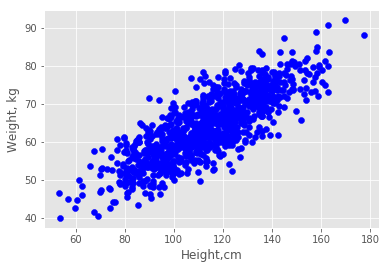

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel("Height,cm")
ax.set_ylabel("Weight, kg")
ax.scatter(heights, weights, color="blue")
fig

There's a linear relationship here, but because of the noise the points are not *exactly* in a line. Now let's pretend we don't know about that function we use to generate heights from weights. We just have a list of heights and a list of weights - no equation or model to relate the two. Now, we'll use linear regression to find a good *fit* for the data.

# Initializing an Empty Linear Regresson Model

First, we have to make an *instance* of the model. The scikit-learn method ``LinearRegression`` is not a model, instead, it's a factory for making models. You can imagine a scenario where you might be experimenting with multiple models at the same time. What happens here is we *call the method ``LinearRegression``*, and its return value is a single, empty Linear Regression model. It's "empty" because it hasn't been trained yet. We'll save that model in a variable we can refer to.

In [11]:
lr = LinearRegression()
type(lr) # lr is an empty linear regression model

sklearn.linear_model.base.LinearRegression

# Training the Model

Now, we have to train the model. The model has a method called ``fit`` that takes, as its arguments, the independent and dependent variables. Remember, for us, the IV is height and the DV is weight. Calling the ``fit`` method with the data as arguments prompts scikit-learn to train the model.

One problem we have to deal with here is that Linear Regression models, by their function definition, must take an array of arrays as their arguments. Right now, heights and weights are arrays of numbers.

In [12]:
print(heights[:5])
print(weights[:5])

[ 148.26301872   91.34628367   98.86534678  121.27570413  132.90888021]
[ 81.17100334  48.97108237  62.2181163   66.26756442  75.61767378]


Here, I'm going to use a numpy method called ``reshape``, which when passed ``(-1, 1)`` as arguments will turn an array of numbers into an array of arrays.

In [13]:
heights = heights.reshape(-1, 1)
weights = weights.reshape(-1, 1)
print(heights[:5])
print(weights[:5])

[[ 148.26301872]
 [  91.34628367]
 [  98.86534678]
 [ 121.27570413]
 [ 132.90888021]]
[[ 81.17100334]
 [ 48.97108237]
 [ 62.2181163 ]
 [ 66.26756442]
 [ 75.61767378]]


The data is the same, but now each datapoint is inside its own array of length 1. Now we are ready to call the ``fit`` function on the model. This trains the model. The first argument is the independent variable, the second one is the dependent variable we're trying to predict. 

In [14]:
lr.fit(heights, weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

That's it! The model is now trained. Scikit-learn did all the math behind the scenes and found the best-fit linear model. Now we're interested in seeing the results. Remember, all lines are described in terms of their slope and intercept - the coefficients of the equation. They now exist, in the ``lr`` regression model, we just have to pull them out.

# Getting the Coefficients

Once you have called the ``fit`` function, the results are stored in the model: in our case, they are stored in the variable ``lr``, which represents the model we made. The intercept is stored in the model in an attribute called ``intercept_``. Like with methods, we use dot notation to access attributes.

In [15]:
print(lr.intercept_)

[ 25.1977965]


The coefficients are stored in an attribute in the Linear Regression model called ``coef_``.

In [16]:
print(lr.coef_)

[[ 0.34268353]]


How well did this Linear Regression model do? Remember, we generated the heights artificially from the formula $\text{weight} = 25.39 + 0.34 \cdot \text{height} + \epsilon$. In other words, the coefficient $\beta_0 = 25.39$ and the coefficient $\beta_1 = 0.34$. Our Linear Regression model, *not knowing what the generating function was*, estimated $\hat{\beta_0} = 25.20$ and $\hat{\beta_1} = 0.3427$. Not bad at all!

We can visualize the model itself by drawing the line on the plot of the data. Remember, the model is simply estimates of the coefficients, which in turn are simply the slope and intercept of a specific line. Therefore, this line can be drawn. 

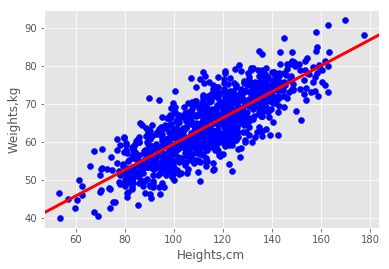

In [21]:
fig.clf()
ax = fig.add_subplot(111)
ax.set_xlabel("Heights,cm")
ax.set_ylabel("Weights,kg")
ax.scatter(heights, weights, color="blue")
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [lr.predict(xmin)[0][0], lr.predict(xmax)[0][0]], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

The red line is a visualization of the model found by Linear Regression: the line that best fits the data. This is simulated data, but like real-world data, in this situation very few points lie *exactly* on the models line. However, scikit-learn has found the best fit. 

# Predicting New, Unseen Data with Our Model

Returning to our alien, scale-crisis scenario: now we have a model. We have found a pattern in the data - in the list of heights and weights. That pattern is a linear relationship between heights and weights. Know a height, and you have a reasonable prediction of a weight. 

Someone new comes in, and the doctor needs to know their weight. But all the scales are broken. With our model, however, we can come up with a decent estimate of the weight. 

Once you have trained your model using the ``fit`` method, you'll be able to use a new method on the classifier called ``predict``. If you provide this method with the independent variable, it will output the model's estimate of the dependent variable.

Let's say an alien comes in and it is 102 cm tall. Using our model, we estimate its weight. 

In [18]:
estimated_weight = lr.predict(102)
print(estimated_weight)

[[ 60.15151699]]


The ``predict`` method can handle a list of heights. If 5 aliens come in and we need to estimate their weights:

In [19]:
estimated_weights = lr.predict([[102], [151], [92], [43]])
estimated_weights

array([[ 60.15151699],
       [ 76.94301017],
       [ 56.72468165],
       [ 39.93318847]])

Now you know how to create an empty Linear Regression model, train it, describe the learned model in terms of its coefficients, and make predictions on new, unseen data, using scikit-learn.

# Multiple Regression
* Four predictors variables, features based on synthetic data
* Single target outcome variables based on predictors and noise (error)

## Step 1. Create the Data

In [25]:
np.random.seed(9216)

x1 = np.random.normal(5, 10, 1000)
x2 = np.random.normal(-2.45, 4, 1000)
x3 = np.random.normal(57.8, 14, 1000)
x4 = np.random.normal(31.4, 20, 1000)

y = 10 + 0.5*x1 - 0.7*x2 + 12*x3 + 4.2*x4

noise = np.random.normal(0, 10, 1000)

y = y + noise

In [26]:
print(x1[0])
print(x2[0])
print(x3[0])
print(x4[0])

-3.81914859115
-0.889918726856
53.6680138441
38.813064092


In [33]:
y[0]

810.42736888447678

## Step 2. Combine features into array
* First, need to create lists of lists
* Then, need to transpose the matrix, so features are in columns

In [34]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [35]:
X = np.array([x1, x2, x3, x4])
X.shape

(4, 1000)

In [37]:
X = np.transpose(X)
X.shape

(1000, 4)

In [38]:
X[:5]

array([[ -3.81914859,  -0.88991873,  53.66801384,  38.81306409],
       [  3.21665202,  -5.10366395,  44.51421288,  51.31930515],
       [ 13.25139355,  -1.99399843,  63.95832489,  32.65571066],
       [  3.34980234,   1.3460251 ,  22.4937569 ,   0.57547326],
       [  0.88206081,   1.17477565,  63.10216672,  56.66324692]])

## Step 3. Fit Model to training data
* Obtain the intercept and coefficients of regression equation

In [40]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lr.intercept_

11.828092118839436

In [42]:
lr.coef_

array([  0.44653135,  -0.67876566,  11.98323056,   4.18135938])

### Look at original function used to generate the data
* y = 10 + 0.5*x1 - 0.7*x2 + 12*x3 + 4.2*x4
* Compare coefficients obtained in model to given coeffs 
```
Intercept: 10
B_1 = 0.5
B_2 = 0.7
B_3 = 12
B_4 = 4.2
```

### Use predict method to obtain estimated Y-value
* Enter set of X-values as input

In [43]:
lr.predict([1,2,3,4])

//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 63.59222134])